In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.utils import compute_sample_weight
from sklearn.metrics import balanced_accuracy_score
from plot_learning_curve import plot_learning_curve, plot_validation_curve
import matplotlib.pyplot as plt
from sklearn import preprocessing

None


### Loading and Preprocessing Data

In [2]:
credit_train = pd.read_csv("credit-a.tsv", sep = "\t")
credit_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,2,156,0.000,2,1,13,8,1.25,1,1,1.0,0,0,42,0.0,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6.0,0,0,118,560.0,0
2,1,89,0.500,2,1,11,4,1.50,1,0,0.0,0,0,74,824.0,0
3,2,125,1.540,2,1,13,8,3.75,1,1,5.0,1,0,1,3.0,0
4,2,43,5.625,2,1,13,8,1.71,1,0,0.0,0,2,8,0.0,0


In [3]:
credit_train.shape

(690, 16)

In [4]:
credit_train = pd.get_dummies(credit_train, columns=['A1', 'A4', 'A5', 'A7', 'A9', 'A10', 'A12', 'A13'])
credit_train.shape

(690, 38)

In [5]:
credit_train['target'].value_counts()/credit_train.shape[0]

1    0.555072
0    0.444928
Name: target, dtype: float64

In [6]:
normalize_columns = ['A2', 'A3', 'A6','A8', 'A11', 'A14']
def normalize(columns):
  scaler = preprocessing.StandardScaler()
  credit_train[columns] = scaler.fit_transform(credit_train[columns])
normalize(normalize_columns)

In [7]:
X = credit_train[[c for c in credit_train.columns if c != 'target']]
y = credit_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Trying DT Classifier without HyperParameter tunings

In [8]:
base_clf = DecisionTreeClassifier()

In [9]:
base_clf.fit(X_train, y_train)
y_train_pred = base_clf.predict(X_train)
y_test_pred = base_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  1.0
Test Accuracy:  0.8271739130434783


In [10]:
base_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### Generate Learning Curve & Validation Curve with default classifier

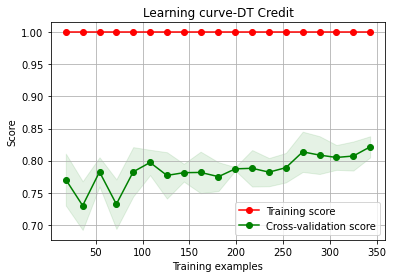

In [11]:
plot_learning_curve(base_clf, "Learning curve-DT Credit", X_train, y_train, ylim=None, cv=4, n_jobs=-1)

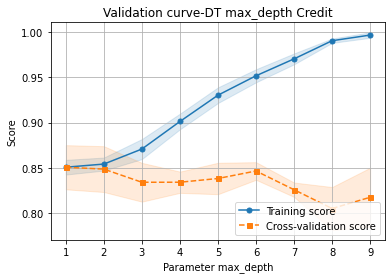

In [12]:
plot_validation_curve(base_clf, X_train, y_train, 'max_depth', np.arange(1, 10, 1), cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score), title="Validation curve-DT max_depth Credit")

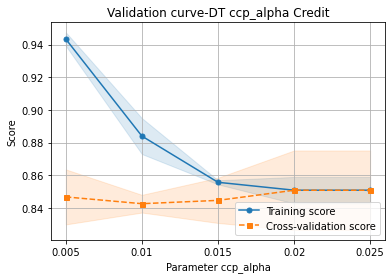

In [14]:
plot_validation_curve(base_clf, X_train, y_train, 'ccp_alpha', np.arange(0.005, 0.03, 0.005), cv=4, n_jobs=-1, scoring=make_scorer(balanced_accuracy_score), title="Validation curve-DT ccp_alpha Credit")

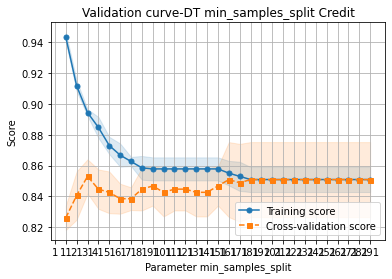

In [15]:
plot_validation_curve(base_clf, X_train, y_train, 'min_samples_split', np.arange(1, 300, 10), cv=4, n_jobs=-1,scoring=make_scorer(balanced_accuracy_score), title="Validation curve-DT min_samples_split Credit")

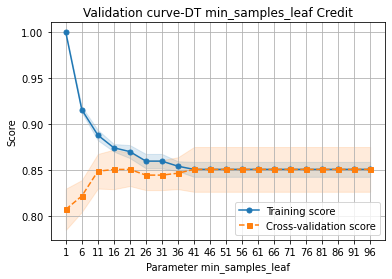

In [16]:
plot_validation_curve(base_clf, X_train, y_train, 'min_samples_leaf', np.arange(1, 100, 5), cv=4, n_jobs=-1, scoring=make_scorer(balanced_accuracy_score), title="Validation curve-DT min_samples_leaf Credit")

### Conducting GridSearch to obtain best HyperParameters

In [17]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': np.arange(0.005, 0.03, 0.005),
    'min_samples_split': np.arange(1, 300, 10),
    'min_samples_leaf': np.arange(1, 100, 5)
}

In [18]:
grid_search = GridSearchCV(base_clf, param_grid= param_grid, cv=4, scoring=make_scorer(balanced_accuracy_score), verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 6000 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0190s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0678s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0499s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1362s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 768 t

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': array([0.005, 0.01 , 0.015, 0.02 , 0.025]),
                         'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
                         'min_samples_split': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291])},
             scoring=make_scorer(balanced_accuracy_score), verbose=10)

In [19]:
df = pd.DataFrame(grid_search.cv_results_)
df.sort_values(by='rank_test_score').head(2)
#df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2999,0.006234,0.000826,0.004487,0.000498,0.015,gini,96,291,"{'ccp_alpha': 0.015, 'criterion': 'gini', 'min...",0.84356,0.849226,0.897595,0.84089,0.857818,0.023162,1
3967,0.005735,0.000432,0.004238,0.000432,0.02,gini,61,71,"{'ccp_alpha': 0.02, 'criterion': 'gini', 'min_...",0.84356,0.849226,0.897595,0.84089,0.857818,0.023162,1


In [20]:
grid_search.best_params_

{'ccp_alpha': 0.005,
 'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 181}

In [21]:
df_n = df.set_index(['param_criterion', 'param_ccp_alpha'])

In [22]:
df_n.sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  \
param_criterion param_ccp_alpha                                                 
gini            0.015                 0.006234      0.000826         0.004487   
                0.020                 0.005735      0.000432         0.004238   
                0.020                 0.005735      0.000432         0.004242   
                0.020                 0.005985      0.000706         0.005233   
                0.020                 0.007729      0.001914         0.004986   

                                 std_score_time param_min_samples_leaf  \
param_criterion param_ccp_alpha                                          
gini            0.015                  0.000498                     96   
                0.020                  0.000432                     61   
                0.020                  0.000437                     61   
                0.020                  0.001089                     61   
                0.020                  0.000706                     61   

                                param_min_samples_split  \
param_criterion param_ccp_alpha                           
gini            0.015                               291   
                0.020                                71   
                0.020                                61   
                0.020                                51   
                0.020                                41   

                                                                            params  \
param_criterion param_ccp_alpha                                                      
gini            0.015            {'ccp_alpha': 0.015, 'criterion': 'gini', 'min...   
                0.020            {'ccp_alpha': 0.02, 'criterion': 'gini', 'min_...   
                0.020            {'ccp_alpha': 0.02, 'criterion': 'gini', 'min_...   
                0.020            {'ccp_alpha': 0.02, 'criterion': 'gini', 'min_...   
                0.020            {'ccp_alpha': 0.02, 'criterion': 'gini', 'min_...   

                                 split0_test_score  split1_test_score  \
param_criterion param_ccp_alpha                                         
gini            0.015                      0.84356           0.849226   
                0.020                      0.84356           0.849226   
                0.020                      0.84356           0.849226   
                0.020                      0.84356           0.849226   
                0.020                      0.84356           0.849226   

                                 split2_test_score  split3_test_score  \
param_criterion param_ccp_alpha                                         
gini            0.015                     0.897595            0.84089   
                0.020                     0.897595            0.84089   
                0.020                     0.897595            0.84089   
                0.020                     0.897595            0.84089   
                0.020                     0.897595            0.84089   

                                 mean_test_score  std_test_score  \
param_criterion param_ccp_alpha                                    
gini            0.015                   0.857818        0.023162   
                0.020                   0.857818        0.023162   
                0.020                   0.857818        0.023162   
                0.020                   0.857818        0.023162   
                0.020                   0.857818        0.023162   

                                 rank_test_score  
param_criterion param_ccp_alpha                   
gini            0.015                          1  
                0.020                          1  
                0.020                          1  
                0.020                          1  
                0.020                          1

In [23]:
grid_search.best_params_

{'ccp_alpha': 0.005,
 'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 181}

In [24]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.005, min_samples_split=181)

In [25]:
grid_search.best_score_

0.8578178290935261

### Generating Learning Curve with tuned Hyperparameters 

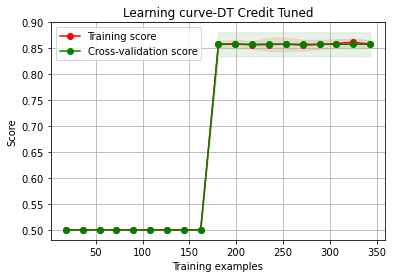

In [26]:
plot_learning_curve(DecisionTreeClassifier(ccp_alpha=0.005, min_samples_split=181), "Learning curve-DT Credit Tuned", X_train, y_train, ylim=None, cv=4, n_jobs=-1)

### Fitting classifier with best parameters and calculating test score

In [27]:
best_clf = DecisionTreeClassifier(ccp_alpha=0.005, min_samples_split=221)

In [28]:
best_clf.fit(X_train, y_train)
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.8578531759805623
Test Accuracy:  0.8717391304347826
